In [5]:
!pip install pyfuzzylite

  Using cached pyfuzzylite-8.0.4-py3-none-any.whl.metadata (10 kB)
Using cached pyfuzzylite-8.0.4-py3-none-any.whl (699 kB)


In [9]:
import fuzzylite as fl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:


# Define SmartRoom Fuzzy Logic Engine (4 inputs, 4 outputs, 11 rules)
engine = fl.Engine(
    name="SmartRoom",
    input_variables=[
        fl.InputVariable(
            name="Temperature", minimum=10.0, maximum=35.0, lock_range=False,
            terms=[
                fl.Trapezoid("Cold", 10.0, 10.0, 15.0, 20.0),
                fl.Triangle("Comfortable", 18.0, 22.0, 26.0),
                fl.Trapezoid("Hot", 24.0, 30.0, 35.0, 35.0),
            ],
        ),
        fl.InputVariable(
            name="Light", minimum=0.0, maximum=1000.0, lock_range=False,
            terms=[
                fl.Trapezoid("Dark", 0.0, 0.0, 150.0, 300.0),
                fl.Triangle("Normal", 250.0, 500.0, 750.0),
                fl.Trapezoid("Bright", 700.0, 850.0, 1000.0, 1000.0),
            ],
        ),
        fl.InputVariable(
            name="Time", minimum=0.0, maximum=24.0, lock_range=False,
            terms=[
                fl.Trapezoid("Morning", 0.0, 0.0, 6.0, 10.0),
                fl.Triangle("Afternoon", 9.0, 13.0, 17.0),
                fl.Triangle("Evening", 16.0, 19.0, 21.0),
                fl.Trapezoid("Night", 20.0, 22.0, 24.0, 24.0),
            ],
        ),
        fl.InputVariable(
            name="Motion", minimum=0.0, maximum=10.0, lock_range=False,
            terms=[
                fl.Triangle("None", 0.0, 0.0, 2.0),
                fl.Triangle("Low", 1.0, 3.0, 5.0),
                fl.Triangle("Medium", 4.0, 6.0, 8.0),
                fl.Triangle("High", 7.0, 10.0, 10.0),
            ],
        ),
    ],
    output_variables=[
        fl.OutputVariable(
            name="HeaterFan", minimum=0.0, maximum=100.0, default_value=0.0,
            lock_range=False, lock_previous=False, aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(100),
            terms=[
                fl.Triangle("Off", 0.0, 0.0, 25.0),
                fl.Triangle("Low", 20.0, 40.0, 60.0),
                fl.Triangle("High", 50.0, 75.0, 100.0),
            ],
        ),
        fl.OutputVariable(
            name="Blinds", minimum=0.0, maximum=100.0, default_value=0.0,
            lock_range=False, lock_previous=False, aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(100),
            terms=[
                fl.Triangle("Closed", 0.0, 0.0, 25.0),
                fl.Triangle("HalfOpen", 25.0, 50.0, 75.0),
                fl.Triangle("Open", 75.0, 100.0, 100.0),
            ],
        ),
        fl.OutputVariable(
            name="LightDimmer", minimum=0.0, maximum=100.0, default_value=0.0,
            lock_range=False, lock_previous=False, aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(100),
            terms=[
                fl.Triangle("Off", 0.0, 0.0, 25.0),
                fl.Triangle("Dim", 20.0, 40.0, 60.0),
                fl.Triangle("Bright", 50.0, 75.0, 100.0),
            ],
        ),
        fl.OutputVariable(
            name="TVVolume", minimum=0.0, maximum=100.0, default_value=0.0,
            lock_range=False, lock_previous=False, aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(100),
            terms=[
                fl.Triangle("Mute", 0.0, 0.0, 25.0),
                fl.Triangle("Medium", 25.0, 50.0, 75.0),
                fl.Triangle("High", 75.0, 100.0, 100.0),
            ],
        ),
    ],
    rule_blocks=[
        fl.RuleBlock(
            name="main", conjunction=fl.Minimum(), disjunction=fl.Maximum(),
            implication=fl.Minimum(), activation=fl.General(),
            rules=[
                fl.Rule.create("if Temperature is Cold and Motion is High then HeaterFan is High"),
                fl.Rule.create("if Temperature is Hot then HeaterFan is Off"),
                fl.Rule.create("if Light is Dark and Time is Evening then LightDimmer is Bright and Blinds is Closed"),
                fl.Rule.create("if Light is Bright and Time is Afternoon then Blinds is Closed"),
                fl.Rule.create("if Motion is None and Time is Night then LightDimmer is Off and TVVolume is Mute"),
                fl.Rule.create("if Motion is Medium and Time is Evening then TVVolume is Medium"),
                fl.Rule.create("if Time is Morning and Light is Dark then LightDimmer is Bright"),
                fl.Rule.create("if Temperature is Comfortable and Motion is Medium then HeaterFan is Low"),
                fl.Rule.create("if Time is Night and Motion is Low then LightDimmer is Dim and TVVolume is Medium"),
                fl.Rule.create("if Motion is High and Light is Dark then LightDimmer is Bright"),
                fl.Rule.create("if Motion is High then TVVolume is High"),
            ],
        )
    ],
)

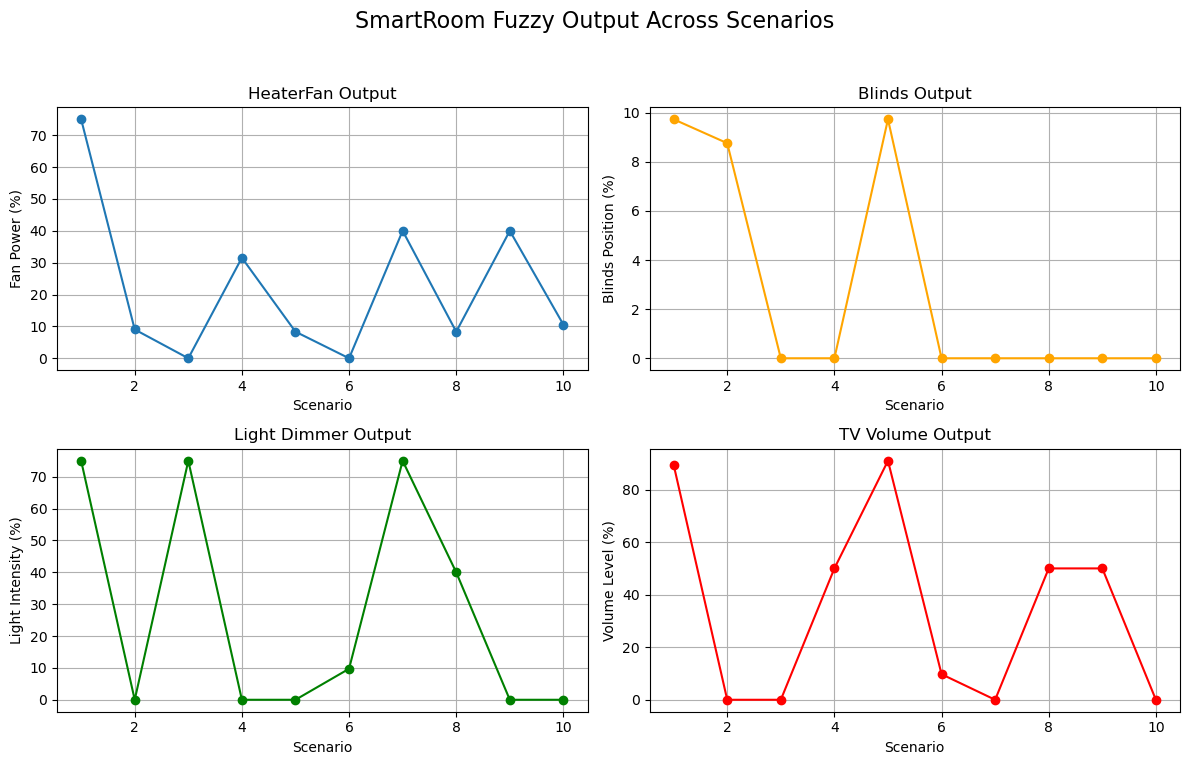

In [13]:
# Simulation scenarios
scenarios = [
    (15.0, 150, 20.0, 8.0),
    (28.0, 850, 14.0, 4.0),
    (12.0, 100, 8.0, 1.0),
    (25.0, 400, 18.0, 6.0),
    (33.0, 950, 15.0, 9.0),
    (18.0, 750, 21.0, 0.0),
    (22.0, 250, 7.0, 5.0),
    (30.0, 100, 23.0, 2.0),
    (19.0, 300, 19.0, 7.0),
    (26.0, 600, 11.0, 0.0),
]

# Run simulations and store results
results = []
for i, (t, l, tm, m) in enumerate(scenarios, 1):
    engine.input_variable("Temperature").value = t
    engine.input_variable("Light").value = l
    engine.input_variable("Time").value = tm
    engine.input_variable("Motion").value = m
    engine.process()
    results.append({
        "Scenario": i,
        "Temperature": t,
        "Light": l,
        "Time": tm,
        "Motion": m,
        "HeaterFan": engine.output_variable("HeaterFan").value,
        "Blinds": engine.output_variable("Blinds").value,
        "LightDimmer": engine.output_variable("LightDimmer").value,
        "TVVolume": engine.output_variable("TVVolume").value,
    })

# Create DataFrame
df = pd.DataFrame(results)

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("SmartRoom Fuzzy Output Across Scenarios", fontsize=16)

axs[0, 0].plot(df["Scenario"], df["HeaterFan"], marker='o')
axs[0, 0].set_title("HeaterFan Output")
axs[0, 0].set_ylabel("Fan Power (%)")

axs[0, 1].plot(df["Scenario"], df["Blinds"], marker='o', color='orange')
axs[0, 1].set_title("Blinds Output")
axs[0, 1].set_ylabel("Blinds Position (%)")

axs[1, 0].plot(df["Scenario"], df["LightDimmer"], marker='o', color='green')
axs[1, 0].set_title("Light Dimmer Output")
axs[1, 0].set_ylabel("Light Intensity (%)")

axs[1, 1].plot(df["Scenario"], df["TVVolume"], marker='o', color='red')
axs[1, 1].set_title("TV Volume Output")
axs[1, 1].set_ylabel("Volume Level (%)")

for ax in axs.flat:
    ax.set_xlabel("Scenario")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
